In [1]:
import glob, os
import pandas as pd
import numpy as np
import seaborn as sns
from itertools import product
import matplotlib.pyplot as plt
import utils
import statistics

In [2]:
METRIC = 'PP0_ENERGY (J)'
#METRIC = 'execution_time'
#METRIC = 'USED_MEMORY'
#METRIC = 'LLC-load-misses_percent'
SERVER = 'nuc'
DATAPATH = f"../experiments/{SERVER}_data.csv"

In [3]:
data = pd.read_csv(DATAPATH)

In [4]:
def improvement(old_values, new_values):
    improvements = []
    for old, new in zip(old_values, new_values):
        if old == 0:
            improvements.append(None)
        else:
            improvement = ((old - new) / old) * 100
            improvements.append(improvement)
    return improvements

In [5]:
subjects = list(set(data['subject'].values) - {'cpython'})
targets = list(set(data['target'].values))

GROUPS = list(
    product(subjects, targets)
)

In [6]:
rows = []
for x, y in GROUPS:
    #print(x, y)
    baseline = data[(data['subject'] == 'cpython') & (data['target'] == y)][METRIC].to_list()    
    new_values = data[(data['subject'] == x) & (data['target'] == y)][METRIC].to_list()

    #baseline = list(map(lambda x: x / 1000, baseline))
    #new_values = list(map(lambda x: x / 1000, new_values))

    row = {'subject': x , 'target' : y, METRIC : statistics.fmean(improvement(baseline, new_values))}
    rows.append(row)
    
improvement_data = pd.DataFrame(rows)
improvement_data

,subject,target,PP0_ENERGY (J)
0,cython,binary_trees,14.445389
1,cython,spectralnorm,15.455922
2,cython,fasta,-1.848135
3,cython,fannkuch_redux,22.171646
4,cython,k_nucleotide,11.981070
5,cython,mandelbrot,10.349784
6,cython,n_body,-74.848823
7,pypy,binary_trees,92.246487
8,pypy,spectralnorm,96.542721
9,pypy,fasta,93.224254


In [7]:
improvement_data['subject'] = pd.Categorical(
    improvement_data['subject'],
    ['cpython', 'pypy', 'numba', 'pyston-lite', 'py3.13-jit', 'nuitka', 'cython', 'codon', 'mypyc']
)

improvement_data = improvement_data.sort_values(by='subject')

In [8]:
colors = [
    "#FF6B6B",  # Coral Red
    "#4ECDC4",  # Turquoise
    "#FFA07A",  # Light Salmon
    "#6A3D9A",  # Purple
    "#FFD700",  # Gold
    "#45B7D1",  # Sky Blue
    "#98D8C8",  # Mint
    "#FF69B4",  # Hot Pink
    "#8B4513"   # Saddle Brown
]

ValueError: Could not interpret value `target` for `x`. An entry with this name does not appear in `data`.

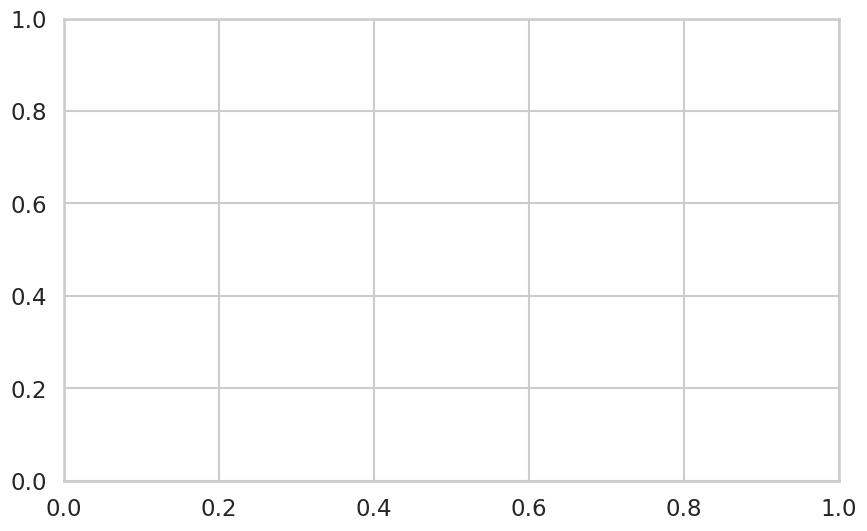

In [11]:
# Create the lineplot
sns.set_theme(style="whitegrid", context="talk")
fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(
    data=improvement_data, 
    x='target', y=METRIC, hue='subject', linewidth=2.5, marker="o", markersize=8, palette=colors
)
sns.despine()

plt.title(f'{METRIC} by Target and Subject', fontsize=18, weight='bold')

plt.xlabel('Target', fontsize=14)
plt.ylabel(f'Percentage Improvement', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.tick_params(axis='both', which='major', labelsize=12)

plt.legend().remove()
plt.tight_layout()

plt.savefig(f"{SERVER}_{METRIC}.pdf", dpi=300)


plt.show()

In [10]:
rows = []
for x in subjects:
    #print(x, y)
    baseline = data[(data['subject'] == 'cpython')][METRIC].to_list()
    new_values = data[(data['subject'] == x)][METRIC].to_list()

    #baseline = list(map(lambda x: x / 1000, baseline))
    #new_values = list(map(lambda x: x / 1000, new_values))

    row = {'subject': x , METRIC: statistics.fmean(improvement(baseline, new_values))}
    rows.append(row)
    
improvement_data = pd.DataFrame(rows)
improvement_data

,subject,PP0_ENERGY (J)
0,cython,-52.160540
1,pypy,86.144903
2,codon,94.011889
3,nuitka,-30.273505
4,pyston-lite,-71.564310
5,mypyc,-73.020522
6,numba,86.762781
7,py3.13-jit,-25.002842
